<a href="https://colab.research.google.com/github/jdsmithwes/Telco-Data-Churn/blob/master/Module3_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Telco Churn Project
Jamaal Smith



In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from scipy import stats
from sklearn.preprocessing import OneHotEncoder

# Data Import and Cleaning

## First Impressions of Data

In [2]:
#import the data
df = pd.read_csv('churn_data.csv')

from scrubbing import info
info(df)

(state                      object
 account length              int64
 area code                   int64
 phone number               object
 international plan         object
 voice mail plan            object
 number vmail messages       int64
 total day minutes         float64
 total day calls             int64
 total day charge          float64
 total eve minutes         float64
 total eve calls             int64
 total eve charge          float64
 total night minutes       float64
 total night calls           int64
 total night charge        float64
 total intl minutes        float64
 total intl calls            int64
 total intl charge         float64
 customer service calls      int64
 churn                        bool
 dtype: object,
 (3333, 21),
   state  account length  ...  customer service calls  churn
 0    KS             128  ...                       1  False
 1    OH             107  ...                       1  False
 2    NJ             137  ...                       0

Based on initial review of the data, we can conclude that the dataset is comprised of 21 columns and 3333 rows. Further, there are no null values in the data set.

The next step in preparing the data for the model is to convert the object type in the phone number, international plan, and voicemail plan columns for the machine learning model.

For now, I will only focus on the international and voicemail plan columns. I made this decision because the phone number a person is assigned plays no role in whether or not a person keeps their service.

In [3]:
df.head()

state  account length  ...  customer service calls  churn
0    KS             128  ...                       1  False
1    OH             107  ...                       1  False
2    NJ             137  ...                       0  False
3    OH              84  ...                       2  False
4    OK              75  ...                       3  False

[5 rows x 21 columns]

## Voicemail and International Plan treatment

In these two columns, the number 1 signifies yes and 0 signifies no

In [4]:
key = {'yes':1, 'no':0}
df['international plan']=df['international plan'].map(key)
df['voice mail plan'] = df['voice mail plan'].map(key)

df['international plan'].astype(str).astype(float)
df['voice mail plan'].astype(str).astype(float)

0       1.0
1       1.0
2       0.0
3       0.0
4       0.0
       ... 
3328    1.0
3329    0.0
3330    0.0
3331    0.0
3332    1.0
Name: voice mail plan, Length: 3333, dtype: float64

As noted before, since it is hard to argue that a given phone number has any relation to churn rate, this column will be eliminated now as part of the feature selection process.

In [0]:
df_final = df.drop('phone number', axis = 1)

## Treatment of Churn Column

In [6]:
df_final['churn'] = df_final['churn']*1
df_final['churn']

0       0
1       0
2       0
3       0
4       0
       ..
3328    0
3329    0
3330    0
3331    0
3332    0
Name: churn, Length: 3333, dtype: int64

## Treatment of State Column

In [7]:
#display(df_final['state'].value_counts())
df_final = df_final.drop('state',axis=1)
df_final.shape

(3333, 19)

At first, I didn't think that state would have any predictive value in the model. However, by using groupby, I was able to organize the dataset by the mean of all explanatory variables for a particular state. This can also ease future calculations because instead of 3000+ rows, the models will only have 51.

This thought was later reversed when treating for outliers. To prevent overfit of the model and knowing that the state isn't an important feature as measured by the chi-squared score later, we will drop the state column

## Outlier treatment

In [8]:
from scrubbing import outliers
outliers(df_final)

(2860, 19)

## Assigning Data and Target Variables

## Data Distribution Visualization

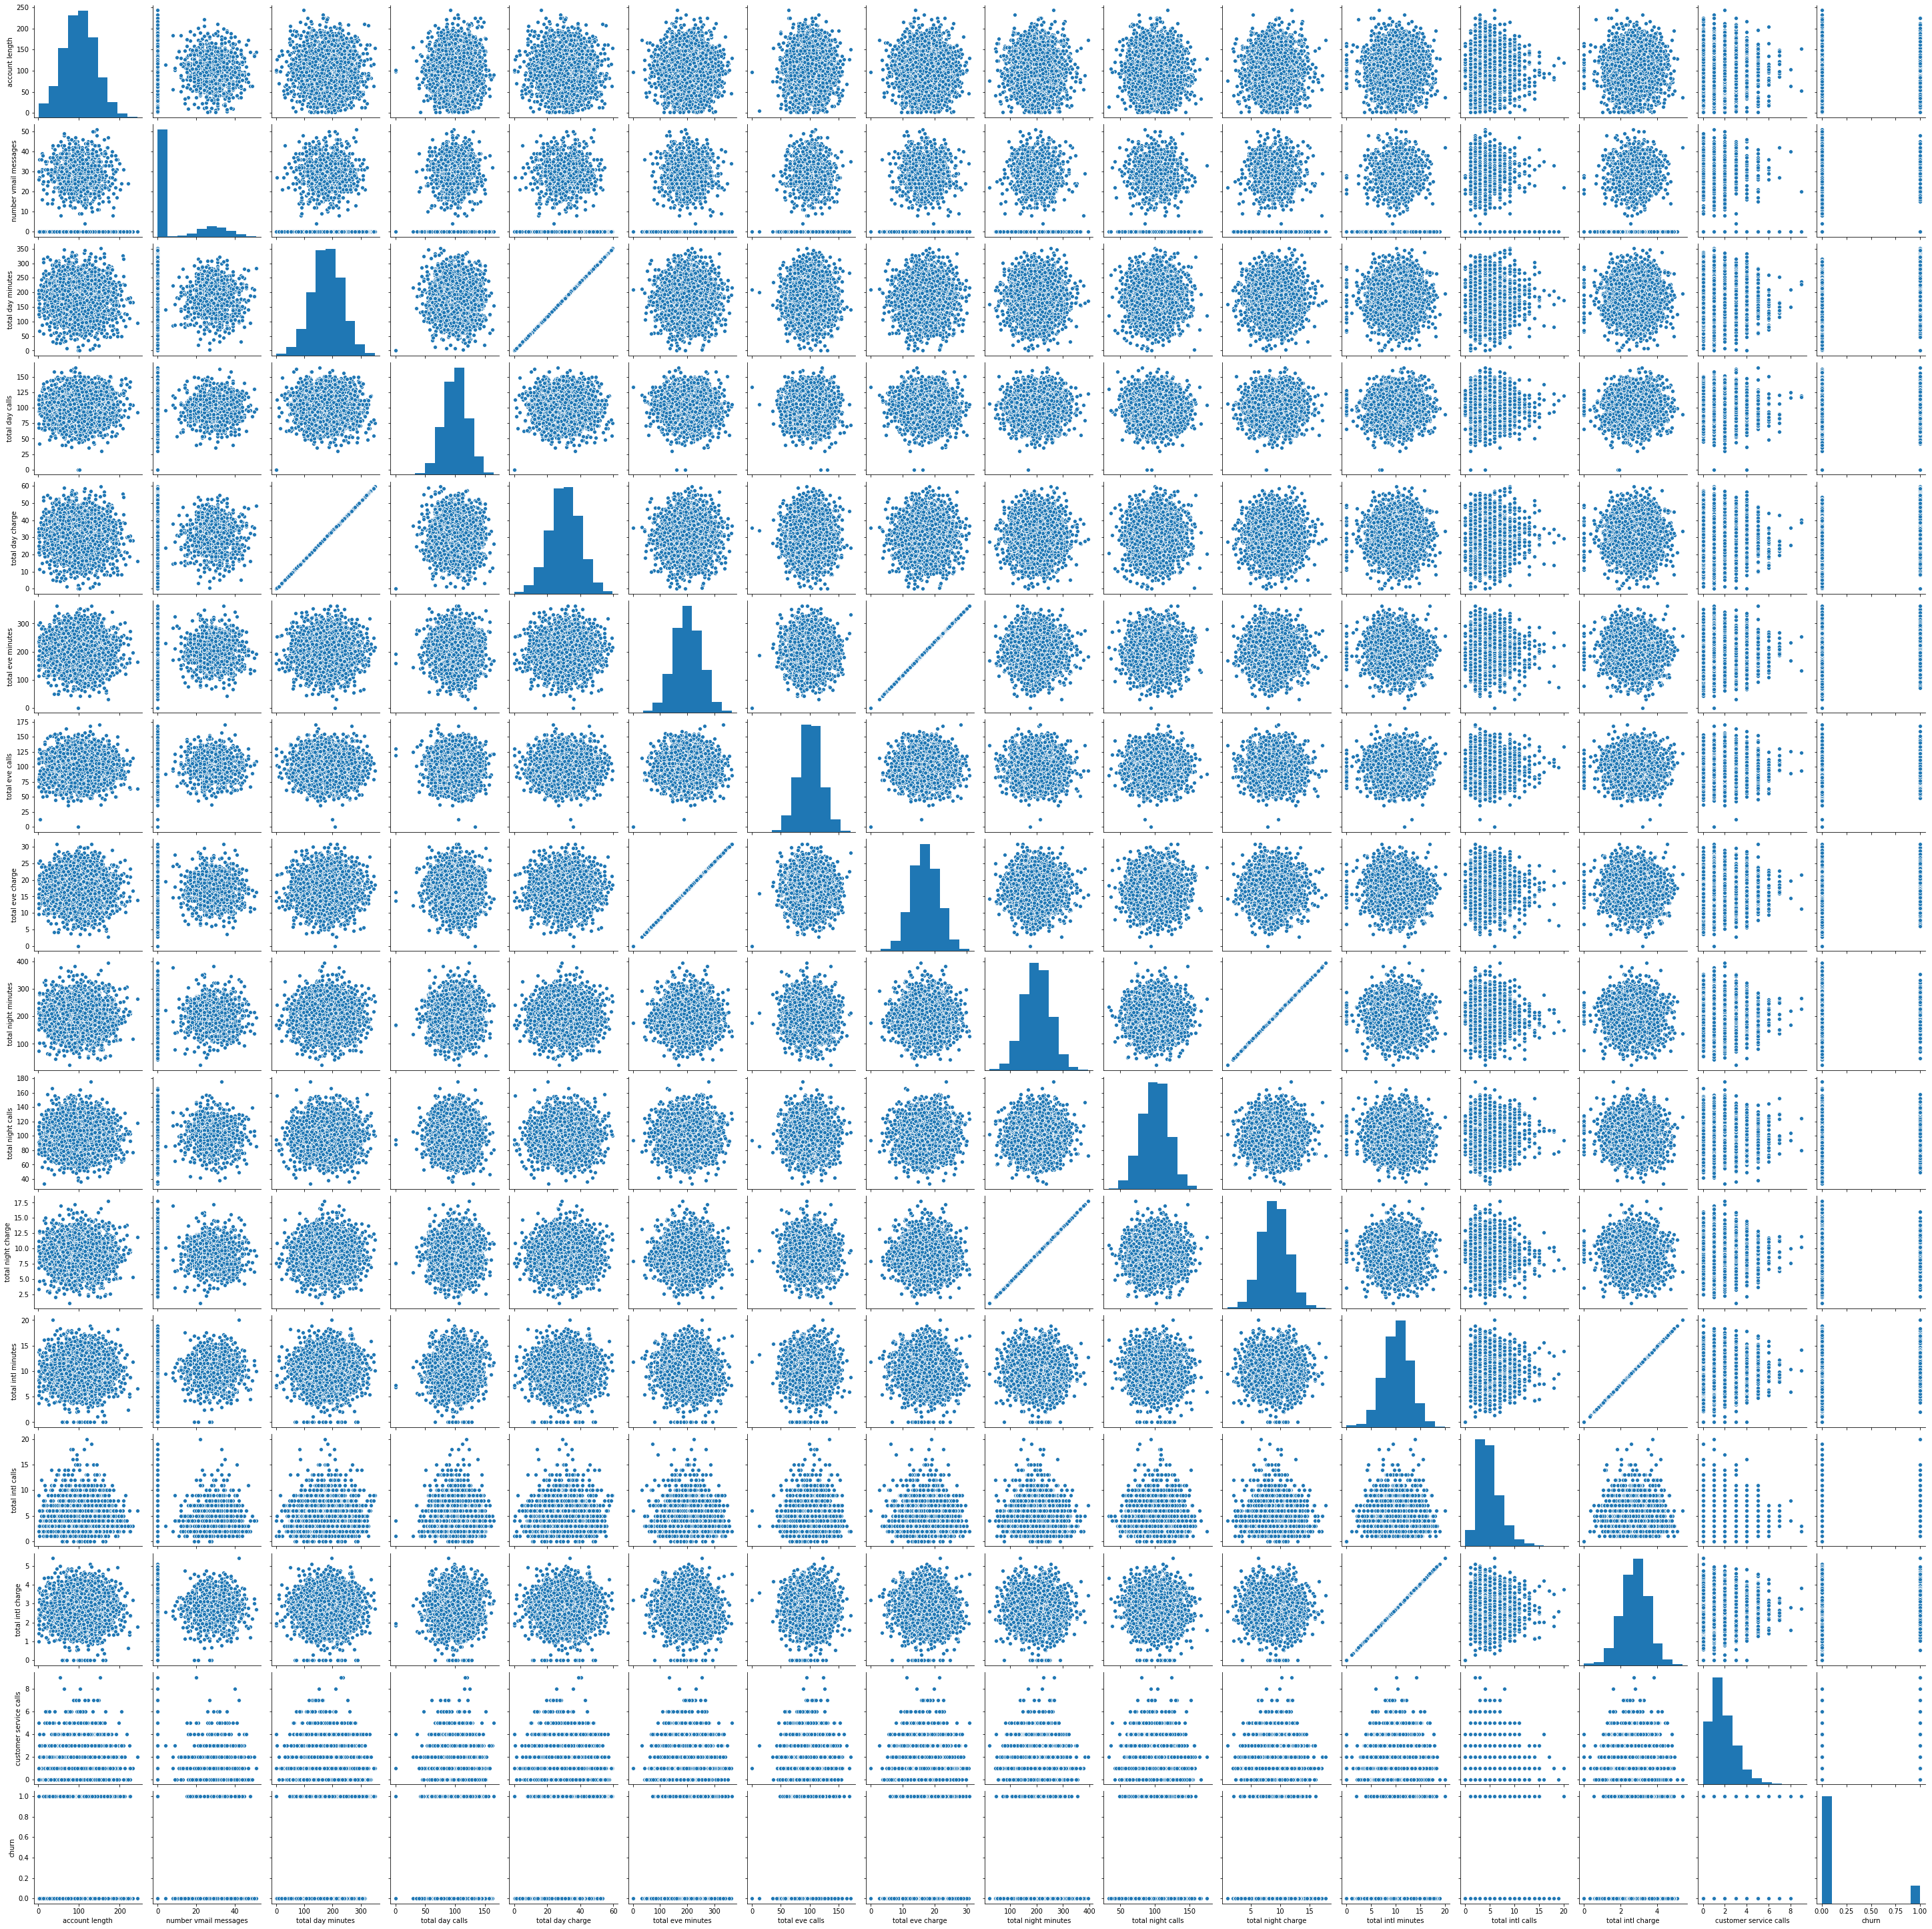

In [13]:
#removed boolean columns to avoid errors and they wouldn't be of much use
import seaborn as sns
data = df_final.drop(columns= ['international plan', 'voice mail plan','area code''churn'])
sns.pairplot(data)
plt.show()

Based on the pairplot shown above, most of the data appears to be normally distributed without any noticeable outliers. Still, to ensure ideal model performance, we will remove any outliers (z-score of 3) from the data.

##Assigning the independent and dependent variabls

In [0]:
 #first we will assign the data as X and the output that we are trying to predict as y.
X = df_final.iloc[:, :18].values
y = df_final.iloc[:, -1].values

The pairplot graph highlights that all of the non-boolean dataframes are somewhat normally distributed. To optimize later model performance, data will be standardized and outliers treated. Again, the above visualization suggests that the data should only endure minor adjustments.

Of all the datasets, the number of voicemail data appears to have lots of 0s in its distribution.

For now, the states column will be left in the dataset and later feature selection measures will provide a statistically significant method for determining whether or not this explanatory variable will be included in the final model.

##Splitting Data into Training and Test Data Sets

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

##Feature Scaling

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Feature Selection

In [0]:
#from scrubbing import bestinputs
#bestinputs(X,y) #must figure out way to include name of dataframe for each feature

The analysis above is designed to highlight the most important variables in our model so that we can select them and train our model on these select features. This also makes sense from a business stand-point as it would be difficult to expect a business to monitor 18 variables per client with much affect. However, they can monitor the top five or three.

In [0]:
#Data with only the top five characteristics
#X = df_final.iloc[:,[7,5,17,2,8]].values
#y = df_final.iloc[:, -1].values

array([[ 45.07, 265.1 ,   1.  ,   0.  , 197.4 ],
       [ 27.47, 161.6 ,   1.  ,   0.  , 195.5 ],
       [ 41.38, 243.4 ,   0.  ,   0.  , 121.2 ],
       ...,
       [ 30.74, 180.8 ,   2.  ,   0.  , 288.8 ],
       [ 36.35, 213.8 ,   2.  ,   1.  , 159.6 ],
       [ 39.85, 234.4 ,   0.  ,   0.  , 265.9 ]])

## Splitting Data

In [0]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [0]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

# Machine Learning Models

##Logistic Regression

In [79]:
from sklearn.linear_model import LogisticRegression
logclassifer = LogisticRegression()
logclassifer.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = logclassifer.predict(X_test)

The Accuracy Score for this model is 0.8657074340527577


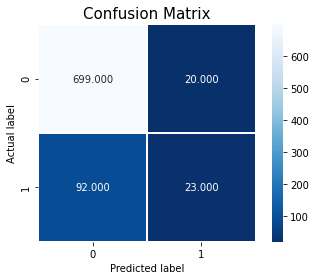

In [81]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)
print('The Accuracy Score for this model is {acc}'.format(acc=acc))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(acc)
plt.title('Confusion Matrix', size = 15);


##Recursive Feature Elimination

In [0]:
from sklearn.feature_selection import RFE
estimator = LogisticRegression()
selector = RFE(estimator,2,step=1)
selector = selector.fit(X_train,y_train)

##Model Performance with Feature Elimanation

The Accuracy Score for this model is 0.8561151079136691


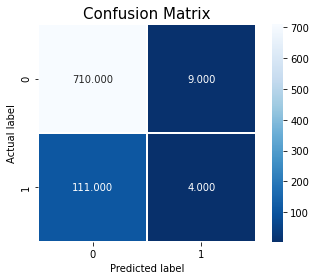

In [85]:
y_predfeature = selector.predict(X_test)
cm = confusion_matrix(y_test,y_predfeature)
acc = accuracy_score(y_test,y_predfeature)
print('The Accuracy Score for this model is {acc}'.format(acc=acc))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {acc}'.format(acc = acc)
plt.title('Confusion Matrix', size = 15);

###Visualizing the Training Set Results

In [0]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 5].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 5].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

IndexError: ignored

###Visualizing the Test Set Results

In [0]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

##Support Vector Machine

In [0]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [0]:
y_pred = classifier.predict(X_test)

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[698  21]
 [ 63  52]]


## Random Forest Regression

In [0]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [0]:
y_pred = regressor.predict(X_test)

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

ValueError: ignored